# WINE dataset results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2024-10-15 14:03:56.897700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Constants

In [2]:
DATA_NAME = "WINE_data"

EPSILON = 0.2
GRID_STEP = 0.1
ORIGINAL_SAMPLE_COUNT = "all"

TF_SEED = 1

## Set up the experiment

Data loaded: ./../data/WINE_data.pickle
Done preparing grid: (259200, 2)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

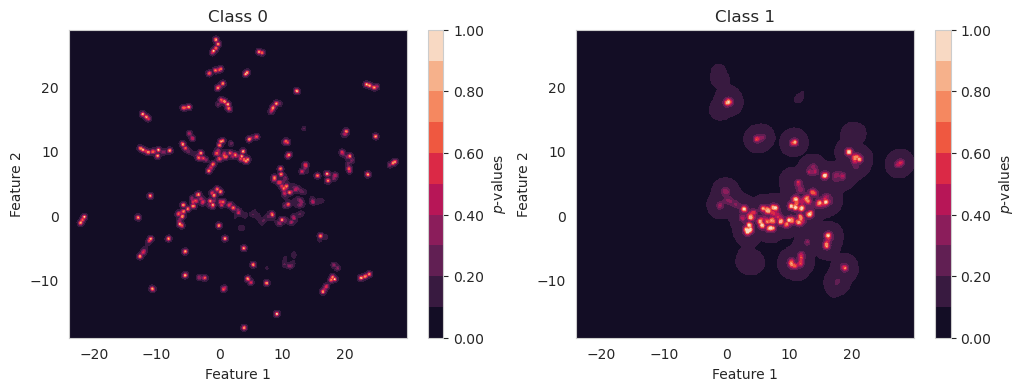

In [3]:
setup_dict = setup_experiment(DATA_NAME, grid_step=GRID_STEP, nr_train_samples=ORIGINAL_SAMPLE_COUNT, prop_size=0.6)
setup_dict.keys()

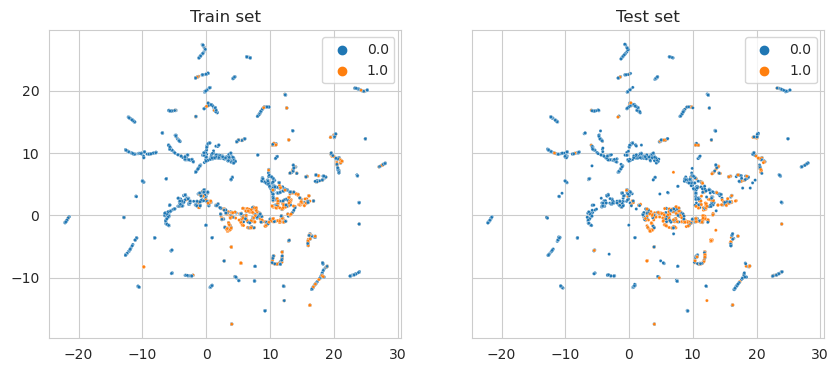

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set")
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set")

plt.legend()
plt.show()

## Original samples result

In [5]:
run_experiment(setup_dict, is_original=True, tf_seed=TF_SEED)

2024-10-15 14:04:01.896673: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
68/68 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.00      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.38      0.50      0.43      2145
weighted avg       0.57      0.75      0.65      2145



## Extended sample results

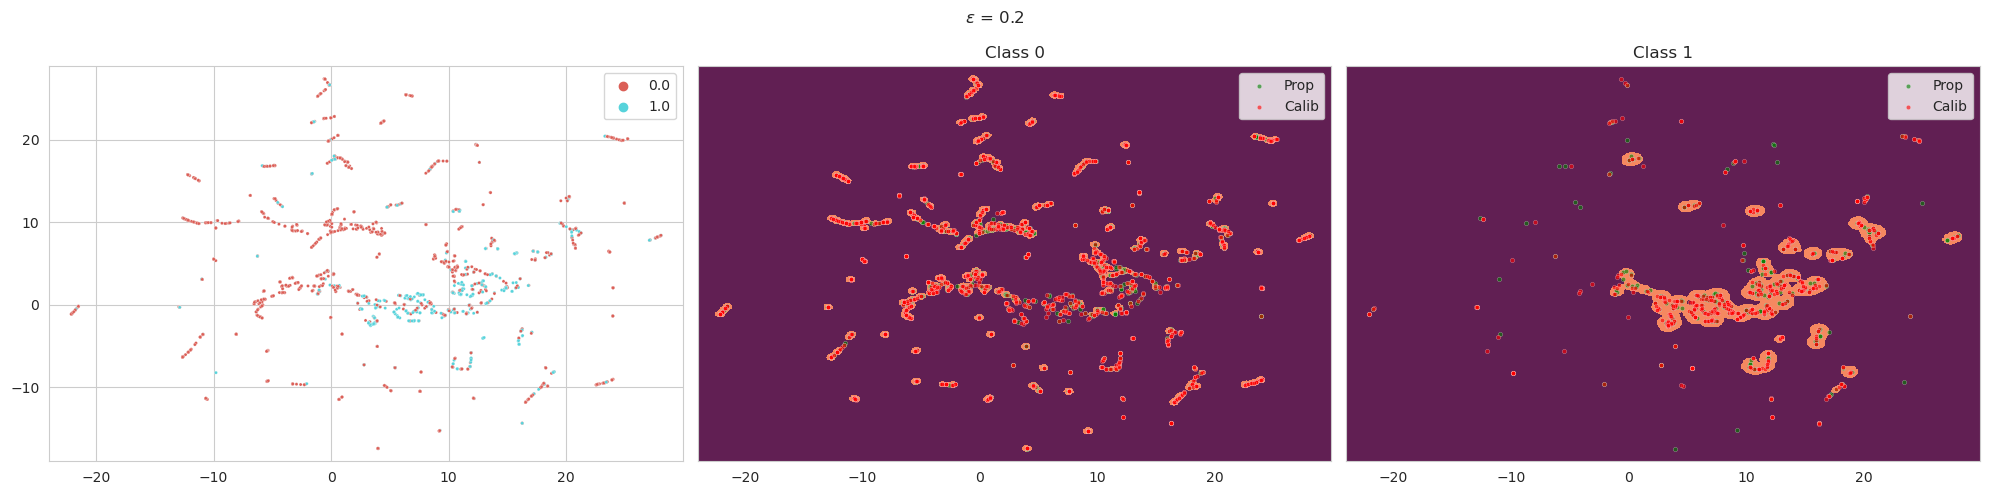

Synthetic samples per class
Label 0.0: (7285, 2)
Label 1.0: (9045, 2)


Total synthetic samples: (16330, 2)
ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      1617
         1.0       0.48      0.80      0.60       528

    accuracy                           0.74      2145
   macro avg       0.70      0.76      0.70      2145
weighted avg       0.81      0.74      0.75      2145



In [6]:
run_experiment(setup_dict, is_o_s=True, epsilon=EPSILON, tf_seed=TF_SEED)